# SGBD

## Imports

In [1]:
import os
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.grid'] = True
rcParams['axes.titleweight'] = 'bold'

In [2]:
def connect(src):
    con = sql.connect(src)
    return con


def execute(cursor, string):
    res = cursor.execute(string).fetchall()
    return sorted(list(zip(*res))[0]) if len(res) else 'PERDU'



## Iteration 2

### Lire une BDD

Connection à un BDD SQL avec python:

Récupérer les tables de la BDD:

In [23]:
src = '/home/dataplus/Cozy Drive/CampusNum/BDD/Iteration2/billboard-200.db'
con = connect(src)
cur = con.cursor()
execute(cur, 'SELECT name FROM sqlite_master WHERE type="table";')

['acoustic_features', 'albums']

Requettes dans la BDD:

In [17]:
req = 'SELECT artist, album, COUNT(date) as WHala FROM albums WHERE rank=1 and date > 2000 GROUP BY artist, album ORDER BY WHala DESC LIMIT 10'
top10 = cur.execute(req).fetchall()

In [18]:
pd.DataFrame(top10)

,0,1,2
0,Adele,21,24
1,Drake,Views,13
2,Soundtrack,Frozen,13
3,Taylor Swift,1989,11
4,Taylor Swift,Fearless,11
5,Adele,25,10
6,Santana,Supernatural,9
7,Usher,Confessions,9
8,'N Sync,No Strings Attached,8
9,Creed,Weathered,8


Utilisation de la fonction pandas **read_sql**:

In [19]:
pd.read_sql(req, con=connect())

,artist,album,WHala
0,Adele,21,24
1,Drake,Views,13
2,Soundtrack,Frozen,13
3,Taylor Swift,1989,11
4,Taylor Swift,Fearless,11
5,Adele,25,10
6,Santana,Supernatural,9
7,Usher,Confessions,9
8,'N Sync,No Strings Attached,8
9,Creed,Weathered,8


In [20]:
df = pd.read_sql('SELECT * FROM acoustic_features', con=con)

In [22]:
df.columns

Index(['id', 'song', 'album', 'artist', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'album_id', 'date'],
      dtype='object')

### Analyse musical du BillBoard200

Moyennage par années:

In [67]:
carac = ['acousticness', 'danceability', 'duration_ms', 'energy',
         'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
         'speechiness', 'tempo', 'date']
feat = df[carac].copy()
feat['date'] = pd.to_datetime(feat['date'])
feat['year'] = feat['date'].apply(lambda x: x.year)

In [78]:
trend = feat.drop(columns='date').groupby('year').mean()
trend = trend[trend.index > 1955]

In [79]:
trend

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
year,,,,,,,,,,,
1956,0.883627,0.489405,148841.793651,0.201612,0.140998,4.619048,0.198261,-17.672389,0.761905,0.236720,109.034841
1957,0.845394,0.409397,171108.439394,0.241626,0.123273,4.712121,0.243202,-16.420303,0.848485,0.095141,109.484470
1958,0.815065,0.471413,163833.347826,0.395780,0.021688,4.760870,0.200176,-11.756587,0.782609,0.063754,114.730043
1959,0.816400,0.428183,208464.921739,0.394663,0.040517,5.460870,0.289024,-13.344017,0.808696,0.176430,111.756296
1960,0.783613,0.497248,178710.834711,0.367413,0.092194,5.471074,0.182090,-13.212231,0.743802,0.075078,112.920339
...,...,...,...,...,...,...,...,...,...,...,...
2015,0.266103,0.532740,235340.950129,0.641605,0.115629,5.247882,0.229030,-8.017984,0.674107,0.091737,120.651579
2016,0.280247,0.539637,233214.295504,0.630402,0.101624,5.213537,0.220787,-7.955032,0.675511,0.095675,120.656077
2017,0.275792,0.551348,223948.277797,0.630018,0.107876,5.180572,0.217876,-7.919609,0.658986,0.099882,120.301062


Courbes de tendences:

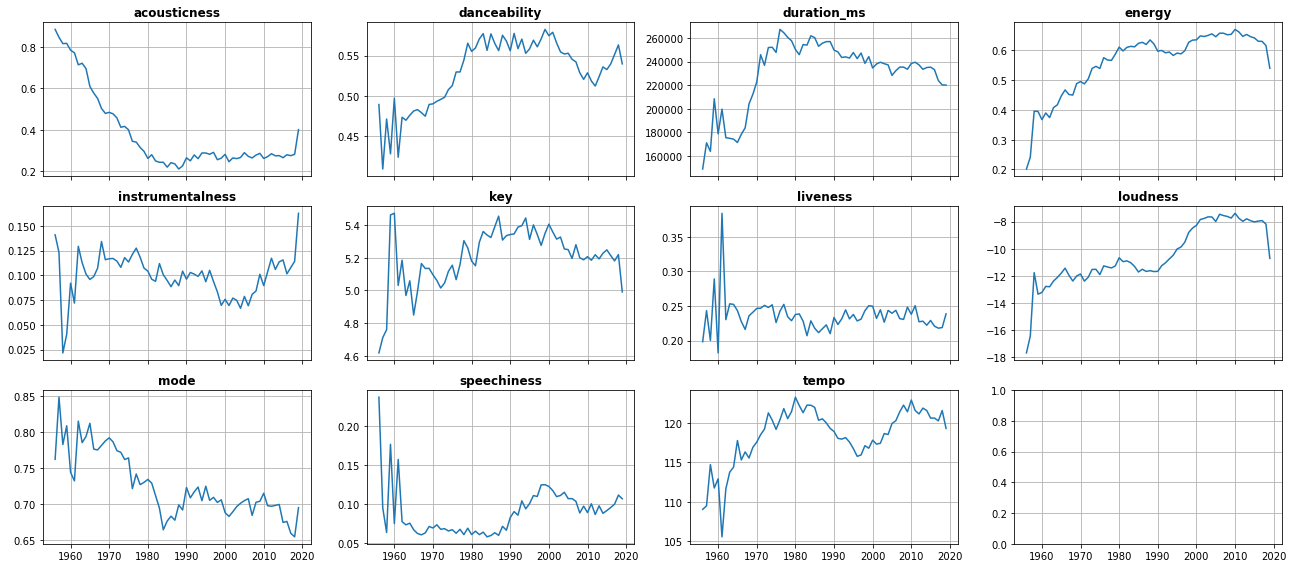

In [80]:
plt.subplots(3, 4, sharex=True)
for i, c in enumerate(trend.columns):
    plt.subplot(3, 4, i+1)
    plt.plot(trend[c])
    plt.title(c)
plt.tight_layout()


Pics de caracéristiques:

In [81]:
trend.idxmax()

acousticness        1956
danceability        1999
duration_ms         1976
energy              2010
instrumentalness    2019
key                 1960
liveness            1961
loudness            2010
mode                1957
speechiness         1956
tempo               1980
dtype: int64

Notes les plus utilisé:

In [167]:
key = feat[['mode', 'key', 'year', 'tempo']].groupby(['year', 'mode', 'key']).count().reset_index('year').groupby('year').idxmax()
key.rename(columns={'tempo': 'pitch'}, inplace=True)
key['count'] = feat[['mode', 'key', 'year', 'tempo']].groupby(['year', 'mode', 'key']).count().reset_index('year').groupby('year').max()

note = {0:'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
tone = {0: 'm', 1: 'M'}

key['pitch'] = key['pitch'].apply(lambda x: str(tone[x[0]]) + ' ' + str(note[x[1]]))

In [168]:
feat

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,date,year
0,0.0555,0.754,142301.0,0.663,0.000000,6.0,0.101,-6.311,0.0,0.4270,90.195,2018-12-21,2018
1,0.2920,0.860,152829.0,0.418,0.000000,7.0,0.106,-9.061,0.0,0.1580,126.023,2018-12-21,2018
2,0.1530,0.718,215305.0,0.454,0.000046,8.0,0.116,-9.012,1.0,0.1270,89.483,2018-12-21,2018
3,0.0153,0.581,189487.0,0.662,0.000000,9.0,0.111,-5.239,1.0,0.3030,93.023,2018-12-21,2018
4,0.0235,0.736,192779.0,0.622,0.000000,6.0,0.151,-4.653,0.0,0.1330,191.971,2018-12-21,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339850,0.6550,0.445,434427.0,0.544,0.000325,8.0,0.235,-11.662,1.0,0.0792,176.723,1963-01-01,1963
339851,0.8350,0.600,375533.0,0.172,0.865000,8.0,0.421,-22.897,1.0,0.0672,135.005,1963-01-01,1963
339852,0.1920,0.459,861933.0,0.606,0.612000,10.0,0.398,-13.427,0.0,0.0645,116.325,1963-01-01,1963
339853,0.5220,0.444,761573.0,0.508,0.025000,10.0,0.929,-11.111,1.0,0.0526,62.879,1963-01-01,1963


In [169]:
c = dict(zip(key['pitch'].unique(), ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']))
key['total'] = feat[['date', 'year']].groupby('year').count()
key['percent'] = key['count'] / key['total'] * 100
key['color'] = key['pitch'].apply(lambda x: c[x])

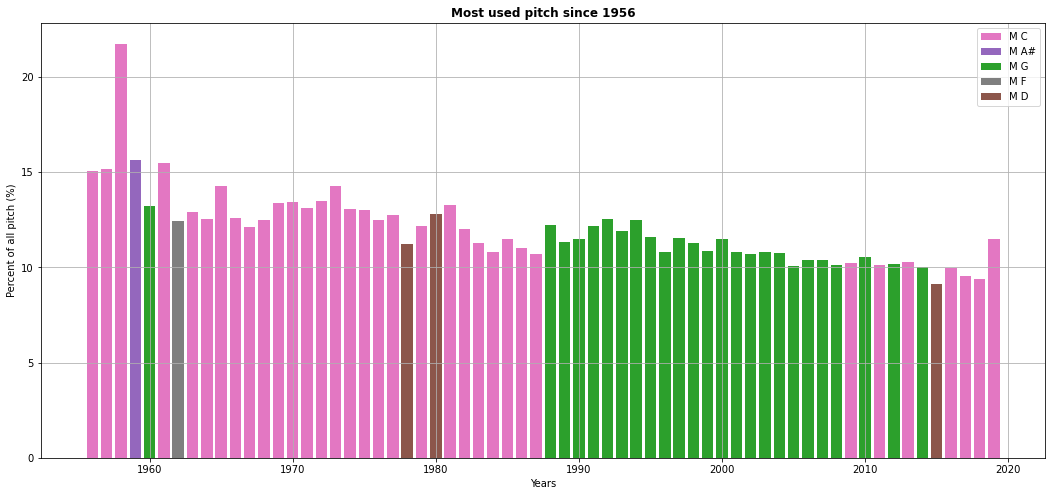

In [195]:
h = plt.bar(x=key.loc[1956:, 'percent'].index,
        height=key.loc[1956:, 'percent'].values,
        color=key.loc[1956:, 'color'])
# for y in key.loc[1956:, 'percent'].index:
#     plt.annotate(key.loc[y, 'pitch'], xy=(y-.5, key.loc[y, 'percent']+.5), rotation=60, fontweight='bold')
plt.xlabel('Years')
plt.ylabel('Percent of all pitch (%)')
plt.title('Most used pitch since 1956')
lst = [2, 3, 4, 6, 22]
plt.legend([h[i] for i in lst], [key.loc[1956+i, 'pitch'] for i in lst])

## Iteration 3

### Modifier une BDD

Insérer des donnée dans une BDD avec Pandas:

In [3]:
src = '/home/dataplus/Cozy Drive/CampusNum/BDD/Iteration3'

Lire les fichiers:

In [4]:
files = os.listdir(src + '/SEM-GTFS')
dfs = []
for f in files:
    dfs.append(pd.read_csv(src + '/SEM-GTFS/' + f))

Ecrire:

In [5]:
con = connect(src + '/TAG_sql_pandas')

for i, table in enumerate(files):
    dfs[i].to_sql(table.split('.')[0], con, if_exists='replace')
con.close()

Faire la même chose en utilisant **sqlite3**

In [29]:
def genInsertQuery(tableName, dct):
    columns = ', '.join(str(x) for x in dct.keys())
    values = ', '.join('"' + str(x) + '"' for x in dct.values())
    query = 'INSERT INTO %s ( %s ) VALUES ( %s );' % (tableName, columns, values)
    return query


def genInsertQueries(tableName, df):
    queries = []
    lst = df.to_dict(orient='records')

    for item in lst:
        queries.append(genInsertQuery(tableName, item))

    return queries


def genInsertFile(tableName, df):
    sqlFile = []
    dct = {'object': 'VARCHAR(255)',
           'float64': 'FLOAT',
           'int64': 'INT'}

    types = [list(df.columns)]
    types.append([dct[str(t)] for t in df.dtypes])

    columns = ', '.join(types[0][i] + ' ' + types[1][i] for i in range(len(types[0])))
    sqlFile.append(f'CREATE TABLE {tableName} ({columns})')
    sqlFile.extend(genInsertQueries(tableName, df))
    # sqlFile.append('COMMIT')

    return sqlFile



In [36]:
con = connect(src + '/TAG_sql_sqlite3')
cur = con.cursor()

for i, df in enumerate(dfs):
    queries = genInsertFile(files[i].split('.')[0], df)
    for q in queries:
        cur.execute(q)

con.commit()
con.close()